In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Расчёт цифрового резистора


### Первый делитель

Первый делитель не вносит в систему погрешности за счёт использования точных компонентов


## Делитель с цифровым резистором

Для наибольшего коэффициента деления используется максимальный номинал на резистивном делителе, таким образом при входном напряжении 100 В на выходе схеме делителя должно получится 0.5
0.5 = 100 \* (x / (10060 + x)) => x = 50.25


Схема рассчитывается как 0.5 = Uвх \* (50.55 / (Rд + 50.55))
тогда сопротивление цифрового резистора рассчитывается как Rд = 25.125 \* Uвх - 50.25


### Относительная погрешность

Абсолютная величина:
Uд = Uвх \* (50.55 / (Rд + Rdelta + 50.55))

Rdelta - погрешность квантования
Rdelta = Rmax / (2 ^ n)

// Тут идёт всё преобразование формулы

delta*Uдел = -2 * Rdelta / (25.125 \* Uвх + Rdelta)


In [64]:
# Колличество шагов на цифровом резисторе
N = 8

# Доступные номиналы резистора
RESITANCES = np.linspace(start=10_060, stop=99, retstep=10_060 - 9961, num=256, dtype=np.int32)[0]

In [65]:
def r_delta(r_max: int, r_step: int):
    return r_max / np.power(2, r_step)


def delta_u_divider(u_input: float, r_max, r_step: int):
    delta = r_delta(r_max, r_step)
    return np.abs((-2 * delta) / (25.125 * u_input + delta))

In [80]:
r_max = np.amax(RESITANCES)

# U входное
X = []
x_layer = np.linspace(start=0, stop=100, num=8)
print(x_layer.size)
# Rdelta
Y = []
y_layer = []
for step in range(N):
    y_layer.append(r_delta(r_max, step))
y_layer = np.array(y_layer)

# delta u дел
Z = []
for u in x_layer:
    z_buf = []
    y_buf = []
    for step in range(x_layer.size):
        y_buf.append(step % N)
        z_buf.append(delta_u_divider(u, r_max, step % 8))
    X.append(x_layer)
    Y.append(y_buf)
    Z.append(z_buf)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

8


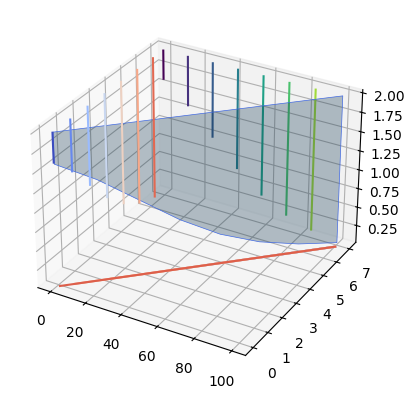

In [97]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.contour(X, Y, Z, zdir='z', offset=0, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=7, cmap='viridis')

plt.show()